In [87]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm, ticker
import os
import scipy.constants as sc
from scipy.interpolate import RegularGridInterpolator
rcParams['figure.figsize'] = (5,2)

In [151]:
direc = '/data/jhyl3/vel_fits/3-5cm_radial'

P = 300
r_in = 10 # disc inner radius in au
r_out = 100 # disc outer radius in au
R_grid = np.logspace(np.log10(r_in), np.log10(r_out), P+1)
N = 400
z = np.linspace(0,10,N+1)

R = np.arange(10,110,10)
c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R
u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega
scale = rho0 / rho0[-1]

In [152]:
def lin_intp(data, z):
    zp = data[0][~np.isnan(data[1])]
    fp = data[1][~np.isnan(data[1])]
    z_trun = z[z < np.max(zp)]
    return np.interp(z_trun, zp, fp)

def grid_gen(direc):
    contents = sorted(os.listdir(direc))

    z_ls = np.linspace(0,10,int(1e6))
    input_grid = np.empty((len(z_ls), len(contents)))
    for i in range(len(contents)):
        data = fits.open(os.path.join(direc, contents[i]))[0].data
        output = 1/lin_intp(data, z_ls)
        output[0] = output[1] # avoids infinities
        input_grid[:,i] = np.array(list(output) + list(np.zeros(len(z_ls)-len(output))))

    interp = RegularGridInterpolator((z_ls, R), input_grid)

    R_trun = R_grid[R_grid > 10] # cannot interpolate outside of input region - need to generate 1 au results?
    output_grid = np.empty((len(z), len(R_trun)))

    for i in range(len(R_trun)):
        for j in range(len(z)):
            output_grid[j, i] = float(interp((z[j], R_trun[i])))
    
    return input_grid, output_grid

In [164]:
direc = '/data/jhyl3/vel_fits/3-6cm_radial'
test = grid_gen(direc)[1][:-1]

/tmp/ipykernel_744065/2184984554.py:14: RuntimeWarning: divide by zero encountered in divide
  output = 1/lin_intp(data, z_ls)


In [168]:
direc_list = [os.path.join('/data/jhyl3/vel_fits', s) for s in os.listdir('/data/jhyl3/vel_fits') if ('radial' in s and '3-' in s)]

In [169]:
direc_list

['/data/jhyl3/vel_fits/3-4cm_radial',
 '/data/jhyl3/vel_fits/3-3cm_radial',
 '/data/jhyl3/vel_fits/3-2cm_radial',
 '/data/jhyl3/vel_fits/3-5cm_radial',
 '/data/jhyl3/vel_fits/3-6cm_radial']

In [170]:
n_a = []
for i in direc_list[1:]:
    print(i)
    n_a.append( np.reshape(grid_gen(i)[1][:-1], (1, N, P)) )

n_a = np.array(n_a)

/data/jhyl3/vel_fits/3-3cm_radial


/tmp/ipykernel_744065/2184984554.py:14: RuntimeWarning: divide by zero encountered in divide
  output = 1/lin_intp(data, z_ls)


/data/jhyl3/vel_fits/3-2cm_radial
/data/jhyl3/vel_fits/3-5cm_radial
/data/jhyl3/vel_fits/3-6cm_radial


In [171]:
n_a.shape

(4, 1, 400, 300)

#### Attempting 2D interpolation

In [66]:
direc = '/data/jhyl3/vel_fits/3-5cm_radial'
contents = sorted(os.listdir(direc))

data = fits.open(os.path.join(direc, contents[3]))[0].data
zp = data[0][~np.isnan(data[1])]
fp = data[1][~np.isnan(data[1])]

z_ls = np.linspace(0,10,int(1e6))
z_trun = z_ls[z_ls < np.max(zp)]

test_output = 1/np.interp(z_trun, zp, fp)
test_output[0] = test_output[1] # avoids infinities
output = np.array(list(test_output) + list(np.zeros(len(z_ls) - len(test_output))))

/tmp/ipykernel_744065/3843447936.py:11: RuntimeWarning: divide by zero encountered in divide
  test_output = 1/np.interp(z_trun, zp, fp)


In [ ]:
z_ls = np.linspace(0,10,int(1e6))
input_grid = np.empty((len(z_ls), len(contents)))
for i in range(len(contents)):
    data = fits.open(os.path.join(direc, contents[i]))[0].data
    output = 1/lin_intp(data, z_ls)
    output[0] = output[1] # avoids infinities
    input_grid[:,i] = np.array(list(output) + list(np.zeros(len(z_ls)-len(output))))

input_coord = [z_ls, R]
interp = RegularGridInterpolator((z_ls, R), input_grid)

R_trun = R_grid[R_grid > 10] # cannot interpolate outside of input region - need to generate 1 au results?
output_grid = np.empty((len(z), len(R_trun)))

for i in range(len(R_trun)):
    for j in range(len(z)):
        output_grid[j, i] = float(interp((z[j], R_trun[i])))

/tmp/ipykernel_744065/1780864524.py:5: RuntimeWarning: divide by zero encountered in divide
  output = 1/lin_intp(data, z_ls)


In [ ]:
input_coord = [z_ls, R]
interp = RegularGridInterpolator((z_ls, R), input_grid)

R_trun = R_grid[R_grid > 10] # cannot interpolate outside of input region - need to generate 1 au results?
output_grid = np.empty((len(z), len(R_trun)))

for i in range(len(R_trun)):
    for j in range(len(z)):
        output_grid[j, i] = float(interp((z[j], R_trun[i])))

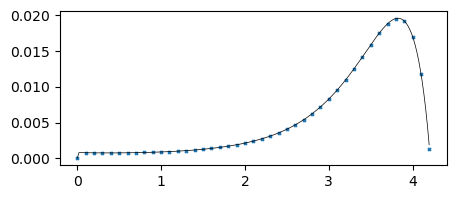

In [ ]:
plt.plot(zp[::int(1e4)], fp[::int(1e4)], color='k', lw=0.5, label='Original')
plt.scatter(z_trun[::int(1e4)], test_output[::int(1e4)], marker='x', s=4)